<a href="https://colab.research.google.com/github/dla9944/2019-2021_agricultural_and_livestock_products/blob/main/%EB%86%8D%EC%B6%95%EC%88%98%EC%82%B0%EB%AC%BC_%EA%B0%80%EA%B2%A9%EC%A0%95%EB%B3%B4_2019_2021_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리 호출

# 기초
import numpy as np
import pandas as pd
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from plotly import express as px

# 사이킷런 분류
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# 지도학습

# 회귀 종류
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 분류 종류
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree



# 비지도학습
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# 평가용
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
df_19 = pd.read_csv('생필품 농수축산물 가격 정보(2019년).csv', encoding = 'cp949')
df_19

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1496335,116,홈플러스 시흥점,311,오이(다다기),1개,1190,2019-12,국산,2,대형마트,545000,금천구,2019-12-30
1,1499702,115,남문시장,202,돼지고기(생삼겹살),1등급(600g),12500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
2,1503366,115,남문시장,310,상추(100g),1개,800,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
3,1499701,115,남문시장,58,"쇠고기(한우,불고기)",1등급(600g),23000,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
4,1503365,115,남문시장,309,양파(1.5kg망),1개,2500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113487,1359195,202,구로시장,312,애호박,1개,1500,2019-01,국내산,1,전통시장,530000,구로구,2019-01-28
113488,1357693,73,뚝도시장,306,"배(신고, 600g)",1개,3900,2019-01,NaN,1,전통시장,200000,성동구,2019-01-28
113489,1359189,202,구로시장,306,"배(신고, 600g)",1개,3500,2019-01,국내산,1,전통시장,530000,구로구,2019-01-28
113490,1357694,73,뚝도시장,307,배추(2.5~3kg),1포기,2500,2019-01,NaN,1,전통시장,200000,성동구,2019-01-28


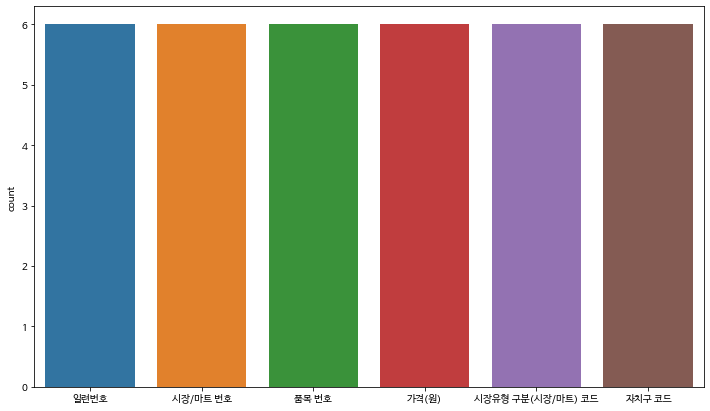

In [4]:
# 잠깐 시각화
plt.figure(figsize=(12,7))

sns.countplot(data=df_19.head(6).sort_values(by = '품목 번호', ascending = True))

In [16]:
df_20 = pd.read_csv('생필품 농수축산물 가격 정보(2020년).csv', encoding = 'cp949')
df_20

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1621162,1,통인시장,309,양파(1.5kg망),1kg,2000,2020-12,"국내산,무안",1,전통시장,110000,종로구,2020-12-21
1,1628949,228,방배종합시장,277,호박,1개268g,1500,2020-12,국내산/인큐베이터,1,전통시장,650000,서초구,2020-12-21
2,1626799,51,NC백화점 불광점,18,닭고기,1마리(1kg),8990,2020-12,올품 토종,2,대형마트,380000,은평구,2020-12-21
3,1630920,223,홈플러스 목동점,278,쇠고기,600g,35982,2020-12,국내산(음성)농협,2,대형마트,470000,양천구,2020-12-21
4,1622882,1,통인시장,309,양파(1.5kg망),1kg,2000,2020-12,"국내산,무안",1,전통시장,110000,종로구,2020-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117447,1509343,68,롯데백화점 미아점,306,"배(신고, 600g)",1개,4000,2020-01,NaN,2,대형마트,305000,강북구,2020-01-23
117448,1509368,206,하나로클럽 미아점,99,돼지고기(생삼겹살),600g,9300,2020-01,100g 1550,2,대형마트,305000,강북구,2020-01-23
117449,1509346,68,롯데백화점 미아점,309,양파(1.5kg망),1.5kg,3980,2020-01,NaN,2,대형마트,305000,강북구,2020-01-23
117450,1509369,206,하나로클럽 미아점,275,닭고기(중간),1마리,4670,2020-01,NaN,2,대형마트,305000,강북구,2020-01-23


In [5]:
df_21 = pd.read_csv('생필품_농수축산물_가격_정보(2021년).csv', encoding = 'cp949')
df_21

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89894,1724775,154,홈플러스 강동점,320,달걀(30개),특란,6490,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
89895,1724776,154,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2021-12,국내산3마리3570,2,대형마트,740000,강동구,2021-12-30
89896,1724777,154,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2021-12,수입산(러시아),2,대형마트,740000,강동구,2021-12-30
89897,1724778,154,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30


In [17]:
df_one = pd.merge(df_19, df_20, how = 'outer')

In [18]:
df_two = pd.merge(df_one, df_21, how = 'outer')

In [19]:
df = df_two
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1496335,116,홈플러스 시흥점,311,오이(다다기),1개,1190,2019-12,국산,2,대형마트,545000,금천구,2019-12-30
1,1499702,115,남문시장,202,돼지고기(생삼겹살),1등급(600g),12500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
2,1503366,115,남문시장,310,상추(100g),1개,800,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
3,1499701,115,남문시장,58,"쇠고기(한우,불고기)",1등급(600g),23000,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
4,1503365,115,남문시장,309,양파(1.5kg망),1개,2500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320838,1724775,154,홈플러스 강동점,320,달걀(30개),특란,6490,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
320839,1724776,154,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2021-12,국내산3마리3570,2,대형마트,740000,강동구,2021-12-30
320840,1724777,154,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2021-12,수입산(러시아),2,대형마트,740000,강동구,2021-12-30
320841,1724778,154,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320843 entries, 0 to 320842
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   일련번호               320843 non-null  int64 
 1   시장/마트 번호           320843 non-null  int64 
 2   시장/마트 이름           320843 non-null  object
 3   품목 번호              320843 non-null  int64 
 4   품목 이름              320787 non-null  object
 5   실판매규격              320843 non-null  object
 6   가격(원)              320843 non-null  int64 
 7   년도-월               320843 non-null  object
 8   비고                 253682 non-null  object
 9   시장유형 구분(시장/마트) 코드  320843 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  320843 non-null  object
 11  자치구 코드             320843 non-null  int64 
 12  자치구 이름             320843 non-null  object
 13  점검일자               320843 non-null  object
dtypes: int64(6), object(8)
memory usage: 36.7+ MB


In [21]:
df.describe()

,일련번호,시장/마트 번호,품목 번호,가격(원),시장유형 구분(시장/마트) 코드,자치구 코드
count,3.208430e+05,320843.000000,320843.000000,3.208430e+05,320843.000000,320843.000000
mean,1.556445e+06,103.142671,212.581568,1.346572e+04,1.510072,415991.341560
std,9.823942e+04,68.695718,109.217373,4.227410e+06,0.499899,185545.761174
min,1.357080e+06,1.000000,13.000000,0.000000e+00,1.000000,110000.000000
25%,1.473784e+06,44.000000,119.000000,2.000000e+03,1.000000,260000.000000
50%,1.560484e+06,92.000000,265.000000,3.450000e+03,2.000000,410000.000000
75%,1.641340e+06,146.000000,307.000000,5.950000e+03,2.000000,560000.000000
max,1.724779e+06,229.000000,324.000000,2.394024e+09,2.000000,740000.000000


In [22]:
# 아래부터 시장유형 구분 이름, 자치구 이름, 품목 이름, 시장/마트 이름을 남기기 위해
# 딕셔너리 제작 시작
mart_name = df['시장유형 구분(시장/마트) 코드']
mart_code = df['시장유형 구분(시장/마트) 이름']
mart = {}
for i in range(len(mart_code)):
      mart[mart_code[i]] = mart_name[i]
print(mart)

{'대형마트': 2, '전통시장': 1}


In [23]:
region_name = df['자치구 이름']
region_code = df['자치구 코드']
region = {}
for i in range(len(region_code)):
      region[region_code[i]] = region_name[i]
print(region)

{545000: '금천구', 680000: '강남구', 560000: '영등포구', 740000: '강동구', 410000: '서대문구', 230000: '동대문구', 500000: '강서구', 440000: '마포구', 140000: '중구', 305000: '강북구', 710000: '송파구', 260000: '중랑구', 215000: '광진구', 320000: '도봉구', 590000: '동작구', 170000: '용산구', 470000: '양천구', 290000: '성북구', 650000: '서초구', 530000: '구로구', 620000: '관악구', 350000: '노원구', 110000: '종로구', 200000: '성동구', 380000: '은평구'}


In [24]:
cat_name = df['품목 이름']
cat_code = df['품목 번호']
cat = {}
for i in range(len(cat_code)):
      cat[cat_code[i]] = cat_name[i]
print(cat)

{311: '오이(다다기)', 202: '돼지고기(생삼겹살)', 310: '상추(100g)', 58: '쇠고기(한우,불고기)', 309: '양파(1.5kg망)', 119: '호박(인큐베이터)', 260: '조기(냉동,수입산)', 283: '닭고기(육계)', 171: '달걀(10개)', 320: '달걀(30개)', 136: '조기(국산,생물)', 264: '명태(냉동,수입산)', 318: '고등어(30cm,수입산)', 305: '사과(부사, 300g)', 254: '오징어(생물,국산)', 266: '고등어(생물,국산)', 152: '명태(러시아,냉동)', 306: '배(신고, 600g)', 308: '무(1kg)', 307: '배추(2.5~3kg)', 312: '애호박', 144: '조기(국산,냉동)', 268: '고등어(냉동,국산)', 248: '배(신고),중급(대)', 125: '배추(국산)', 26: '배추', 24: '양파', 25: '무', 276: '배(신고)', 303: '조기', 288: '동태', 23: '상추', 256: '오징어(냉동,국산)', 13: '고등어', 27: '배', 257: '오징어(냉동,수입산)', 52: '돼지고기(삼겹살)', 18: '닭고기', 285: '돼지고기', 131: nan, 50: '사과(부사)', 277: '호박', 138: '닭고기(토종닭)', 99: '돼지고기(생삼겹살)', 244: '사과(부사),중급(대)', 269: '고등어(냉동,수입산)', 259: '조기(냉동,국산)', 271: '배추(중간)', 284: '배(중품)', 22: '오이', 304: '고등어', 314: '냉동참조기(20cm,국산)', 265: '명태(생물,수입산)', 253: '오징어', 302: '명태', 17: '달걀', 278: '쇠고기', 282: '무(세척무)', 175: '배추(중간)', 274: '무(세척무, 중)', 261: '조기(생물,수입산)', 316: '고등어(30cm,국산)', 118: '호박(인큐베이터),중간

In [25]:
market_name = df['시장/마트 이름']
market_code = df['시장/마트 번호']
market = {}
for i in range(len(market_code)):
      market[market_code[i]] = market_name[i]
print(market)

{116: '홈플러스 시흥점', 115: '남문시장', 114: '현대시장', 222: '홈플러스 독산점', 44: '이마트 역삼점', 130: '롯데백화점 영등포점', 154: '홈플러스 강동점', 31: '인왕시장', 88: '롯데백화점 청량리점', 45: '롯데백화점 강남점', 213: '화곡본동시장', 123: '홈플러스 월드컵점', 8: '롯데마트 서울역점', 66: '수유재래시장', 153: '이마트 명일점', 147: '롯데백화점 잠실점', 91: '동원시장', 40: '홈플러스 등촌점', 80: '이마트 자양점', 27: '이마트 창동점', 127: '남성시장', 10: '용문시장', 102: '목3동시장', 214: '이마트 목동점', 90: '우림시장', 13: '돈암제일시장', 217: '방림시장', 120: '망원시장', 151: '암사종합시장', 28: '홈플러스 방학점', 22: '이마트 여의도점', 19: '대림중앙시장', 56: '롯데백화점', 218: '신세계백화점 강남점', 108: '남구로시장', 140: '하나로클럽 양재점', 133: '원당종합시장', 25: '방학동도깨비시장', 33: '현대백화점 신촌점', 11: '남대문시장', 103: '신영시장', 96: '공릉동 도깨비시장', 82: '롯데마트 강변점', 32: '영천시장', 148: '홈플러스 잠실점', 1: '통인시장', 26: '신창시장', 2: '신세계백화점', 129: '태평백화점', 206: '하나로클럽 미아점', 15: '이마트 미아점', 136: '세이브 마트', 94: '홈플러스 면목점', 60: '이마트 청계점', 20: '영등포전통시장', 216: '도곡시장', 145: '마천중앙시장', 134: '신원시장(신림1동)', 21: '홈플러스 영등포점', 207: '관악신사시장(신림4동)', 215: '청담삼익시장', 74: '이마트 왕십리점', 38: '송화시장', 200: '뉴코아아울렛 강남점', 14: '장위골목시장', 6: '이마트 용산점',

In [26]:
# 필요 데이터 확인
# df.iloc[:,0:6].sort_values(by='자치구 이름')

In [27]:
df['가격(원)'].value_counts().head(20) # 가격이 0원인 행 삭제 예정

3000    15383
2000    13706
2500    12974
4000    12420
5000    10549
1000     9691
3500     8389
1500     8247
6000     6038
2980     4436
4500     4094
500      3911
3980     3812
0        3694
1980     3678
6500     3211
5500     3188
4980     3097
2990     2684
3990     2586
Name: 가격(원), dtype: int64

In [28]:
df['품목 이름'].isnull().sum() # 결측치 확인

56

In [29]:
# 아래부터 필요없는 행 제거 예정
# 주의
df.drop(['시장유형 구분(시장/마트) 이름','시장유형 구분(시장/마트) 코드'], axis = 1, inplace = True)

In [30]:
df.drop(['자치구 이름','시장/마트 이름'],axis=1, inplace = True)

In [31]:
df.drop(['점검일자','실판매규격','품목 이름','비고','일련번호'], axis = 1, inplace = True)

In [32]:
# df.drop('일련번호', axis = 1, inplace = True)

In [33]:
df # drop된 내용 확인

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
0,116,311,1190,2019-12,545000
1,115,202,12500,2019-12,545000
2,115,310,800,2019-12,545000
3,115,58,23000,2019-12,545000
4,115,309,2500,2019-12,545000
...,...,...,...,...,...
320838,154,320,6490,2021-12,740000
320839,154,144,1190,2021-12,740000
320840,154,264,3490,2021-12,740000
320841,154,256,4980,2021-12,740000


In [34]:
df['가격(원)'].value_counts().head(20)

3000    15383
2000    13706
2500    12974
4000    12420
5000    10549
1000     9691
3500     8389
1500     8247
6000     6038
2980     4436
4500     4094
500      3911
3980     3812
0        3694
1980     3678
6500     3211
5500     3188
4980     3097
2990     2684
3990     2586
Name: 가격(원), dtype: int64

In [35]:
# 가격이 0원인 행 sort시켜서 다시 선언
df = df.sort_values(by='가격(원)')
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
234816,147,302,0,2021-01,710000
222105,154,264,0,2020-01,740000
180372,44,288,0,2020-07,680000
111459,129,152,0,2019-02,590000
180353,44,288,0,2020-07,680000
...,...,...,...,...,...
148594,10,256,310000,2020-10,170000
25965,94,306,403890,2019-11,260000
139423,223,288,34902990,2020-10,470000
127610,214,13,35002980,2020-11,470000


In [36]:
# 가격이 0원인 상품, 1원인 상품 iloc로 삭제
df = df.iloc[3695:,:]
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019-07,500000
261572,214,312,90,2021-05,470000
243730,102,25,100,2021-02,470000
65247,146,310,100,2019-08,710000
87660,114,311,100,2019-06,545000
...,...,...,...,...,...
148594,10,256,310000,2020-10,170000
25965,94,306,403890,2019-11,260000
139423,223,288,34902990,2020-10,470000
127610,214,13,35002980,2020-11,470000


In [37]:
# 23억, 3500만원, 3490만원어치 상품 삭제 (outlier)
df = df.iloc[:317145]
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019-07,500000
261572,214,312,90,2021-05,470000
243730,102,25,100,2021-02,470000
65247,146,310,100,2019-08,710000
87660,114,311,100,2019-06,545000
...,...,...,...,...,...
244208,45,50,210000,2021-02,680000
179632,40,58,260520,2020-07,500000
92710,63,58,288200,2019-05,170000
148594,10,256,310000,2020-10,170000


In [38]:
# # 년도-월을 전부 월별로 바꾸기
# df['년도-월'] = pd.to_datetime(df['년도-월'])
# df['년도-월'] = df['년도-월'].dt.month

In [39]:
df.sort_values(by = '년도-월')

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
112685,40,254,4490,2019-01,500000
112453,133,119,2000,2019-01,620000
113438,78,264,3000,2019-01,215000
113439,78,256,3000,2019-01,215000
113441,202,152,3000,2019-01,530000
...,...,...,...,...,...
311533,26,266,2500,2021-12,320000
310896,8,311,1330,2021-12,140000
311693,220,311,1330,2021-12,410000
317078,224,312,1580,2021-12,440000


In [40]:
# 년도-월을 전부 연도별로 바꾸기
df['년도-월'] = pd.to_datetime(df['년도-월'])
df['년도-월'] = df['년도-월'].dt.year

<ipython-input-40-f842229a530b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['년도-월'] = pd.to_datetime(df['년도-월'])
<ipython-input-40-f842229a530b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['년도-월'] = df['년도-월'].dt.year


In [41]:
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019,500000
261572,214,312,90,2021,470000
243730,102,25,100,2021,470000
65247,146,310,100,2019,710000
87660,114,311,100,2019,545000
...,...,...,...,...,...
244208,45,50,210000,2021,680000
179632,40,58,260520,2020,500000
92710,63,58,288200,2019,170000
148594,10,256,310000,2020,170000


In [42]:
df.isnull().sum() # 결측치 확인

시장/마트 번호    0
품목 번호       0
가격(원)       0
년도-월        0
자치구 코드      0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317145 entries, 70063 to 25965
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   시장/마트 번호  317145 non-null  int64
 1   품목 번호     317145 non-null  int64
 2   가격(원)     317145 non-null  int64
 3   년도-월      317145 non-null  int64
 4   자치구 코드    317145 non-null  int64
dtypes: int64(5)
memory usage: 14.5 MB


In [44]:
df.sort_values(by = '년도-월').tail(20)

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
261619,102,288,3000,2021,470000
286067,109,312,1500,2021,530000
278526,16,23,3000,2021,290000
286080,108,308,1500,2021,530000
261626,103,24,3000,2021,470000
307465,62,308,1500,2021,170000
303839,62,23,1000,2021,170000
257273,32,312,1000,2021,410000
241185,102,22,1000,2021,470000
261603,102,28,3000,2021,470000


In [45]:
# df.replace('-', inplace = True)

In [46]:
# 특수문자 삭제
# df["년도-월"] = df["년도-월"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
# df['년도-월'] = df['년도-월'].astype('int')

In [47]:
df['년도-월'].value_counts()

2020    116137
2019    112145
2021     88863
Name: 년도-월, dtype: int64

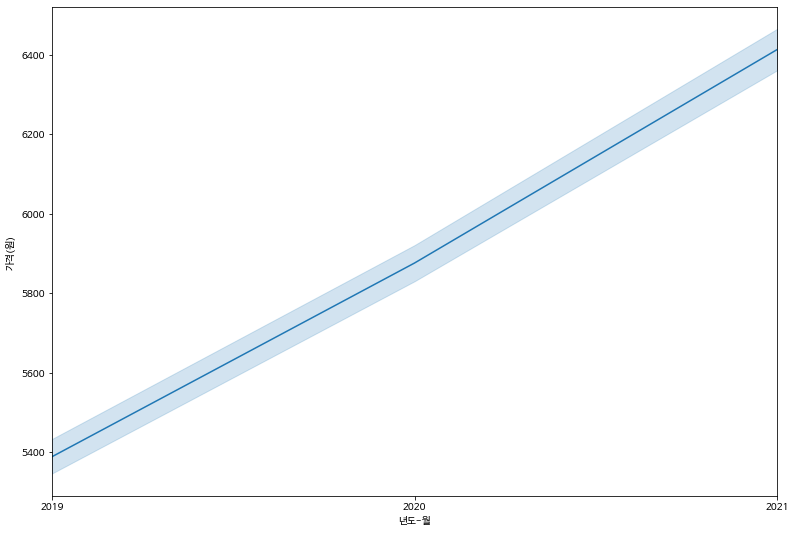

In [48]:
# 연도 - 가격별로 시각화 
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x='년도-월', y = '가격(원)' )
plt.xlim(2019,2021)
plt.xticks(ticks=[2019,2020,2021])
plt.show()

# 추수 시기(추석)에 농산물 가격이 상승하는 것으로 보임
# 코로나 이전과 이후의 데이터가 차이나는 것으로 확인

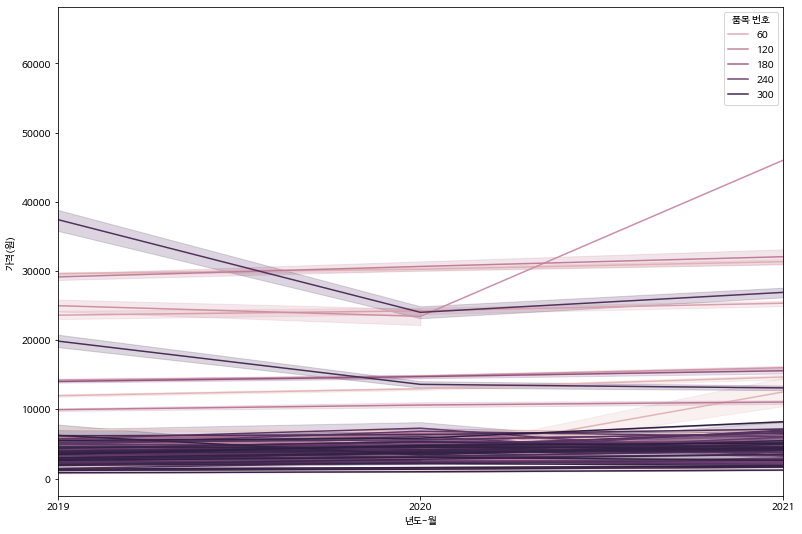

In [49]:
# 연도 - 가격- 품목 번호별로 시각화
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x='년도-월', y = '가격(원)', hue = '품목 번호')
plt.xlim(2019,2021)
plt.xticks(ticks=[2019,2020,2021])
plt.show()

# 추수 시기(추석)에 농산물 가격이 상승하는 것으로 보임
# 코로나 이전과 이후의 데이터가 차이나는 것으로 확인

In [50]:
df.columns

Index(['시장/마트 번호', '품목 번호', '가격(원)', '년도-월', '자치구 코드'], dtype='object')

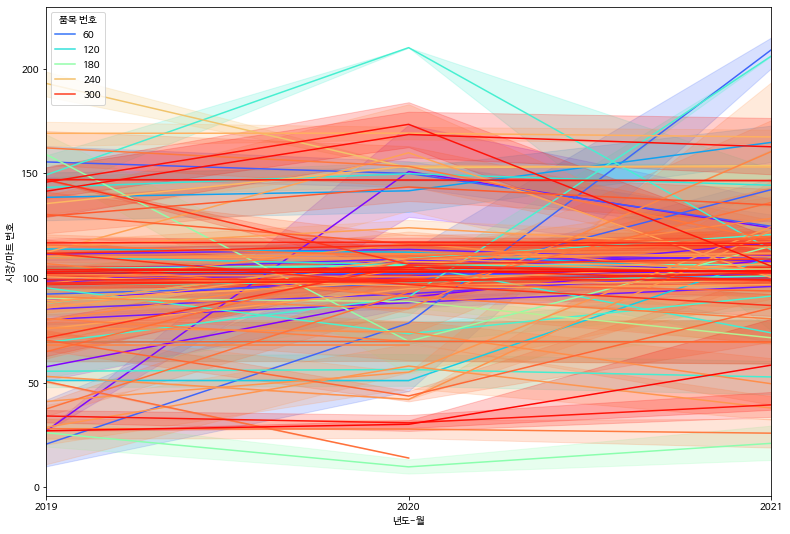

In [51]:
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x = '년도-월', y = '시장/마트 번호', hue='품목 번호', palette='rainbow')
plt.xlim(2019,2021)
plt.xticks(ticks=[2019,2020,2021])
plt.show()

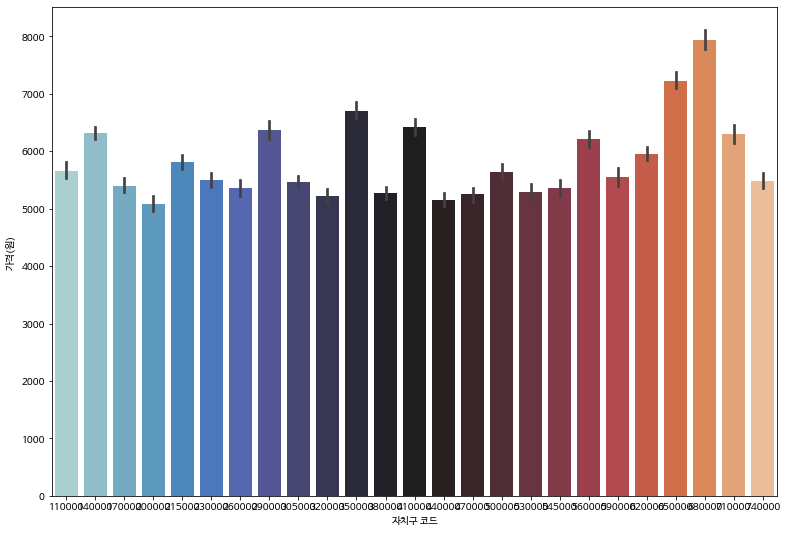

In [52]:
plt.figure(figsize = (13,9))
sns.barplot(data = df, x = '자치구 코드', y = '가격(원)',palette='icefire')
plt.show()

In [53]:
df= df.rename(columns={'년도-월': '년'})
df
# 열 이름을[ 년]으로 바꿈

,시장/마트 번호,품목 번호,가격(원),년,자치구 코드
70063,213,119,10,2019,500000
261572,214,312,90,2021,470000
243730,102,25,100,2021,470000
65247,146,310,100,2019,710000
87660,114,311,100,2019,545000
...,...,...,...,...,...
244208,45,50,210000,2021,680000
179632,40,58,260520,2020,500000
92710,63,58,288200,2019,170000
148594,10,256,310000,2020,170000


In [54]:
# X,y 를 다르게 구분해서 훈련 시작

X = df.drop('가격(원)', axis = 1)
y = df['가격(원)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
# df.reset_index()
# df

In [ ]:
# df.index # 인덱스를 년도-월로 할 예정

In [ ]:
# df.set_index('년도-월', inplace = True)

In [ ]:
df.index

Int64Index([ 70063, 261572, 243730,  65247,  87660,  64851, 244482,  34530,
             98772,  17180,
            ...
            136318,  28357, 279554,  15267, 228853, 244208, 179632,  92710,
            148594,  25965],
           dtype='int64', length=317145)

In [55]:
# 모델 설정
model = DecisionTreeRegressor(random_state=10, max_depth = 500)

In [56]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [57]:
pred

array([5659.13043478, 6000.        , 6021.40350877, ..., 5980.        ,
       5549.16216216, 3593.63636364])

In [58]:
# mse 평가
mean_squared_error(y_test, pred)

4894082.655264355

In [59]:
# rmse 평가
mean_squared_error(y_test, pred, squared=False)

2212.2573664165648

In [60]:
# mae 평가

mean_absolute_error(y_test, pred)

919.285426159241

In [61]:
model.score(X_train, y_train) # R²
# 0.89점

0.891201008366647

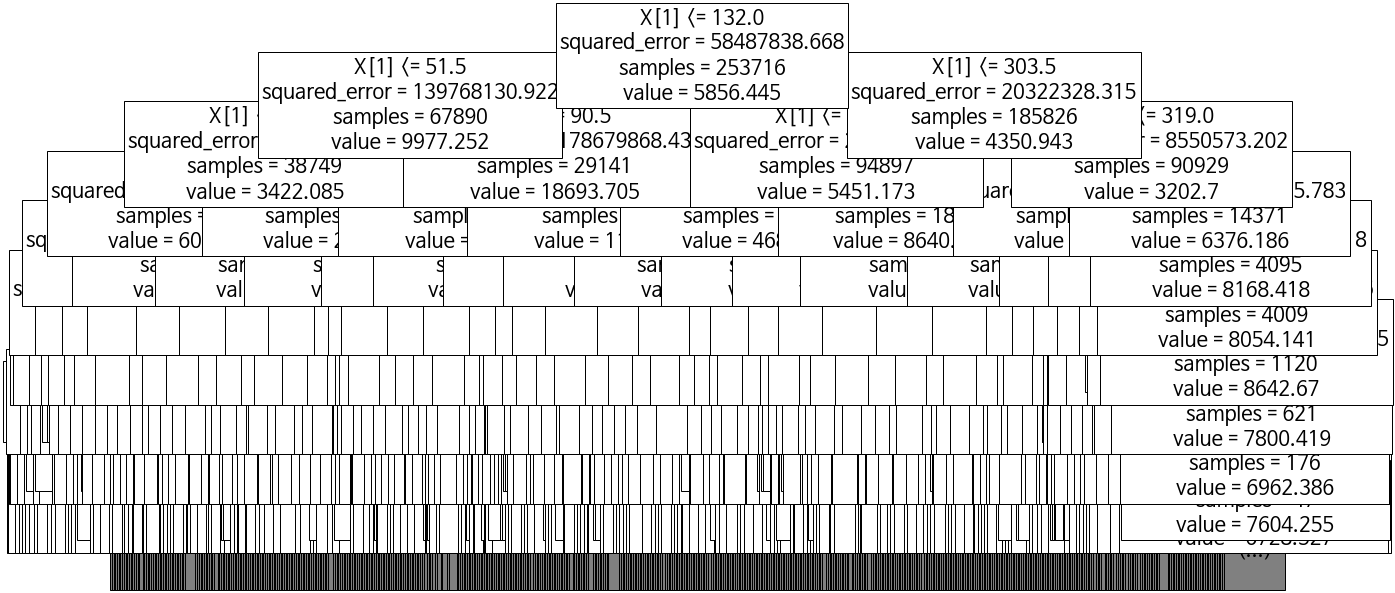

In [62]:
plt.figure(figsize=(20, 10)) # 그래프 크기 설정
plot_tree(model, max_depth=9, fontsize=20)
plt.show() #39초

In [54]:
# 로지스틱 회귀 사용


model = LogisticRegression()


In [ ]:
# model.fit(X_train, y_train)
# 22초만에 세션 다운

In [ ]:
pred = model.predict(X_test)

In [ ]:
# probability
pred_proba = model.predict_proba(X_test)
pred_proba

In [ ]:
# mse -> 실제값, 예측값
mean_squared_error(y_test, pred)

In [ ]:
# rmse
mean_squared_error(y_test, pred) ** 0.5 

In [ ]:
# 학습시킨 독립변수, 종속변수
model.score(X_train, y_train) # R²

In [63]:
# Ridge회귀 시작


# alpht는 100부터
ridge = Ridge(alpha = 100)


In [64]:
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

In [65]:
# mse 평가
mean_squared_error(y_test, pred)

52898610.50872822

In [66]:
# rmse 평가
mean_squared_error(y_test, pred, squared=False)

7273.143096951154

In [67]:
# mae 평가

mean_absolute_error(y_test, pred)

4495.213399595774

In [68]:
ridge.score(X_test, y_test)
# 0.89점

0.07609482106561738

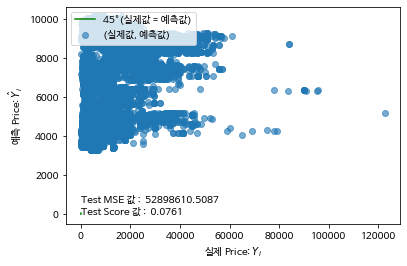

In [69]:
plt.subplot(1,1,1)
plt.scatter(y_test, pred, label = '(실제값, 예측값)', alpha=.6)
plt.plot(np.linspace(0,50,200), np.linspace(0,50,200), color = 'green', label = "45°(실제값 = 예측값)")
plt.xlabel("실제 Price: $Y_i$")
plt.ylabel("예측 Price: $\hat{Y}_i$")
plt.legend(loc='upper left')
plt.text(y=5,x=30, s=f'Test MSE 값 : {mean_squared_error(y_test,pred) : .4f}\nTest Score 값 : {ridge.score(X_test,y_test) : .4f}')
plt.show()

In [70]:
neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv = 9) # cv 추후 변경
neg_mse_scores

array([-3.60714228e+07, -3.08163924e+07, -2.21701456e+07, -1.46796532e+07,
       -9.56461727e+06, -6.15701008e+06, -4.39228106e+06, -1.40239579e+07,
       -5.25801149e+08])

In [71]:
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse

6049.123889326475

In [72]:
print('개별 negative mse scores:', np.round(neg_mse_scores),
      '\n개별 rmse scores:', np.round(rmse_scores,3), '\n평균 RMSE: {0:.3F}'.format(avg_rmse) )

개별 negative mse scores: [-3.60714230e+07 -3.08163920e+07 -2.21701460e+07 -1.46796530e+07
 -9.56461700e+06 -6.15701000e+06 -4.39228100e+06 -1.40239580e+07
 -5.25801149e+08] 
개별 rmse scores: [ 6005.949  5551.251  4708.518  3831.404  3092.672  2481.332  2095.777
  3744.858 22930.354] 
평균 RMSE: 6049.124


In [73]:
alphas = [1, 10, 50, 500]
for alpha in alphas :
   ridge = Ridge(alpha = alpha)

   neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv = 9)
   avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
   print('alpha {0}일때 9fold의 평균 rmse: {1:.3f}'.format(alpha, avg_rmse))

alpha 1일때 9fold의 평균 rmse: 6049.135
alpha 10일때 9fold의 평균 rmse: 6049.134
alpha 50일때 9fold의 평균 rmse: 6049.130
alpha 500일때 9fold의 평균 rmse: 6049.079


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


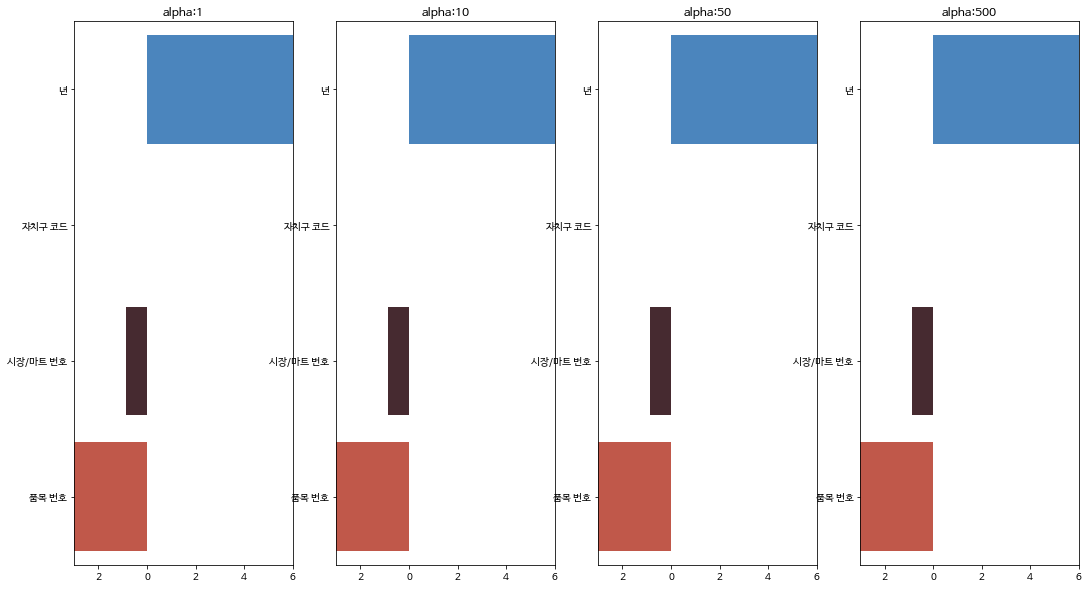

In [74]:
# alpha (0~100)에 따른 피처별 회귀 계수를 데이터프레임으로 표시

fig, axs = plt.subplots(figsize=(18,10), nrows=1, ncols=4)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
   ridge = Ridge(alpha = alpha)
   ridge.fit(X, y)
   coeff = pd.Series(data=ridge.coef_, index = X.columns)
   colname = 'alpha:'+str(alpha)
   coeff_df[colname]=coeff

   coeff = coeff.sort_values(ascending  =False)
   axs[pos].set_title(colname)
   axs[pos].set_xlim(-3, 6)
   sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos], palette = 'icefire')

plt.show()

In [75]:
#LightGBM 시도

# # 사용할 params정의
params = {"n_estimators" : [100, 500, 1000],"learning_rate" : [0.01, 0.05, 0.1, 0.3]
          ,"lambda_l1" : [0, 10, 20],"lambda_l2" : [0, 10, 20],"max_depth" : [5, 10, 15, 20],"subsample": [0.6, 0.8, 1]}

In [76]:
model = LGBMRegressor(random_state = 100)
new_model = RandomizedSearchCV(model,
      param_distributions = params, 
      cv = 9,
      random_state=100, n_jobs = -1)

In [77]:
new_model.fit(X_train, y_train) # 시간 소요 체크 6분

RandomizedSearchCV(cv=9, estimator=LGBMRegressor(random_state=100), n_jobs=-1,
                   param_distributions={'lambda_l1': [0, 10, 20],
                                        'lambda_l2': [0, 10, 20],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.6, 0.8, 1]},
                   random_state=100)

In [78]:
new_model.best_score_ # 최적의 점수계산

0.8794411265369829

In [79]:
new_model.best_params_

{'subsample': 1,
 'n_estimators': 1000,
 'max_depth': 10,
 'learning_rate': 0.05,
 'lambda_l2': 0,
 'lambda_l1': 0}

In [80]:
cv_result = pd.DataFrame(new_model.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_lambda_l2,param_lambda_l1,...,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
0,1.825051,0.033002,0.205189,0.009385,0.6,100,5,0.1,20,10,...,0.850834,0.854098,0.788115,0.805161,0.790776,0.853346,0.862901,0.834291,0.028684,8
1,17.454089,3.642432,3.654693,1.121999,0.8,1000,5,0.1,0,0,...,0.895562,0.899471,0.827478,0.847220,0.832985,0.896500,0.902354,0.877257,0.029891,3
2,11.976882,0.878053,2.871410,0.048606,1,1000,15,0.05,20,0,...,0.896917,0.900544,0.828430,0.847688,0.834963,0.897218,0.903608,0.878277,0.029783,2
3,11.311822,0.087997,2.838543,0.100241,1,1000,10,0.05,0,0,...,0.899502,0.901596,0.829839,0.849274,0.835178,0.897979,0.903947,0.879441,0.029864,1
4,1.773065,0.022991,0.218056,0.006732,0.8,100,10,0.1,20,10,...,0.871480,0.874311,0.804759,0.823478,0.809571,0.873007,0.878622,0.852992,0.029198,7
5,2.472124,0.396500,0.158077,0.046110,0.8,100,5,0.01,10,20,...,0.688194,0.690985,0.634159,0.642555,0.630883,0.683998,0.696428,0.670204,0.024897,10
6,8.961624,0.078777,0.997978,0.025634,1,500,20,0.01,20,10,...,0.849432,0.853922,0.785155,0.803162,0.788854,0.852068,0.860556,0.832444,0.028996,9
7,1.427251,0.018957,0.171953,0.005907,0.8,100,20,0.3,10,0,...,0.892877,0.896520,0.825354,0.844922,0.831086,0.893622,0.898706,0.874587,0.029455,4
8,1.742790,0.014224,0.210252,0.008953,0.8,100,20,0.1,20,20,...,0.872439,0.876690,0.806393,0.824457,0.810846,0.874257,0.882496,0.854921,0.029646,6
9,8.773481,3.834288,1.415708,0.762014,0.6,500,10,0.05,0,20,...,0.890856,0.893751,0.822085,0.841719,0.829335,0.891058,0.897413,0.872061,0.029679,5


In [81]:
pred = new_model.predict(X_test)

In [82]:
# mse -> 실제값, 예측값
mean_squared_error(y_test, pred)

5170047.612086405

In [83]:
new_model.score(X_train, y_train) # score 88점

0.882745895066071

In [84]:
# rmse 평가
mean_squared_error(y_test, pred, squared=False)

2273.7738700421387

In [85]:
# 테이블로 평가
comparison = pd.DataFrame({
    'actual': y_test, # 실제값
    'pred': pred
}) 
comparison

,actual,pred
241395,6980,5403.420101
64424,6000,5692.630279
214799,5480,6226.896304
174404,3000,4174.821790
167169,5933,9183.662804
...,...,...
55507,2990,2651.708288
139266,2000,1831.575637
113362,5980,4668.324778
12758,4990,5449.988778


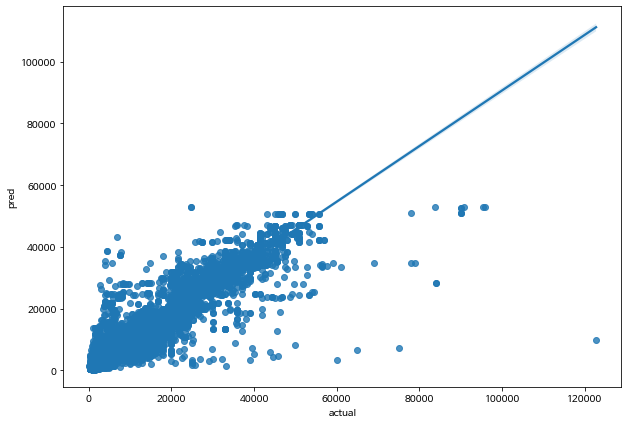

In [86]:
# regplot 제작
plt.figure(figsize=(10, 7))
sns.regplot(x = 'actual', y= 'pred', data = comparison)
plt.show()